Why perform a Brain Tumor Classification on Google Colab?

Google Colab offers access to Nvidia GPUs, which are essential for training deep learning models, especially for computer vision tasks like this one. Therefore, Colab is an ideal environment for this project.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 99% 147M/149M [00:08<00:00, 16.9MB/s]
100% 149M/149M [00:08<00:00, 19.4MB/s]


After downloading the brain tumor MRI dataset from Kaggle, we want to ensure we create adequate dataframes for each MRI brain tumor categories

In [3]:
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    #Check if it's a directory
    if os.path.isdir(label_path):
      #Iterate through Images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        #Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create a Dataframe with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df


We now want to use this function to get the path to the Training Dataset.
To visualize what's includes in our training set we can print it to validate if the path is correct.

In [4]:
print(os.listdir('/content/Training'))

['meningioma', 'pituitary', 'glioma', 'notumor']


Path for /content/Training is validated and correct. Proceed to implementing function to get paths for both training and testing

In [5]:
#training dataset
tr_df = get_class_paths('/content/Training')

In [6]:
tr_df

Class Path       Class
0     /content/Training/meningioma/Tr-me_0093.jpg  meningioma
1     /content/Training/meningioma/Tr-me_0566.jpg  meningioma
2     /content/Training/meningioma/Tr-me_0364.jpg  meningioma
3     /content/Training/meningioma/Tr-me_0741.jpg  meningioma
4     /content/Training/meningioma/Tr-me_0885.jpg  meningioma
...                                           ...         ...
5707     /content/Training/notumor/Tr-no_1370.jpg     notumor
5708     /content/Training/notumor/Tr-no_1090.jpg     notumor
5709     /content/Training/notumor/Tr-no_0529.jpg     notumor
5710     /content/Training/notumor/Tr-no_1007.jpg     notumor
5711     /content/Training/notumor/Tr-no_0709.jpg     notumor

[5712 rows x 2 columns]

In [7]:
#testing
ts_df = get_class_paths('/content/Testing')

In [8]:
ts_df

Class Path       Class
0     /content/Testing/meningioma/Te-meTr_0008.jpg  meningioma
1       /content/Testing/meningioma/Te-me_0070.jpg  meningioma
2       /content/Testing/meningioma/Te-me_0255.jpg  meningioma
3       /content/Testing/meningioma/Te-me_0121.jpg  meningioma
4       /content/Testing/meningioma/Te-me_0043.jpg  meningioma
...                                            ...         ...
1306       /content/Testing/notumor/Te-no_0363.jpg     notumor
1307       /content/Testing/notumor/Te-no_0133.jpg     notumor
1308       /content/Testing/notumor/Te-no_0267.jpg     notumor
1309       /content/Testing/notumor/Te-no_0187.jpg     notumor
1310       /content/Testing/notumor/Te-no_0252.jpg     notumor

[1311 rows x 2 columns]

Let's visualize the training dataframe using matplotlib

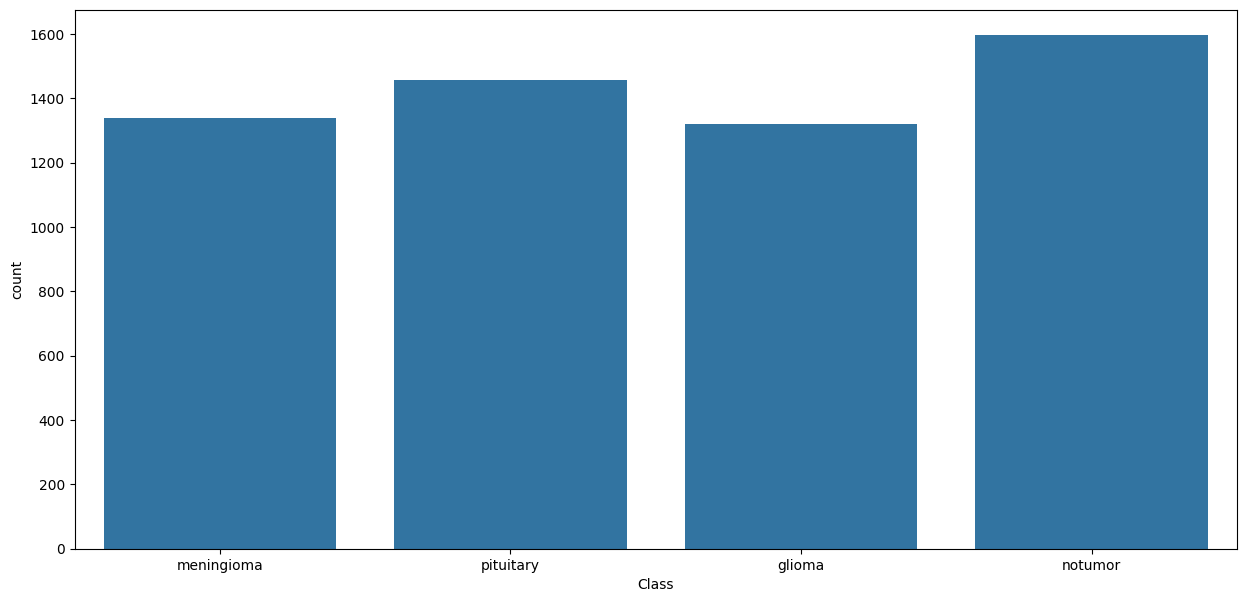

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

We'll do the same for the testing dataframe

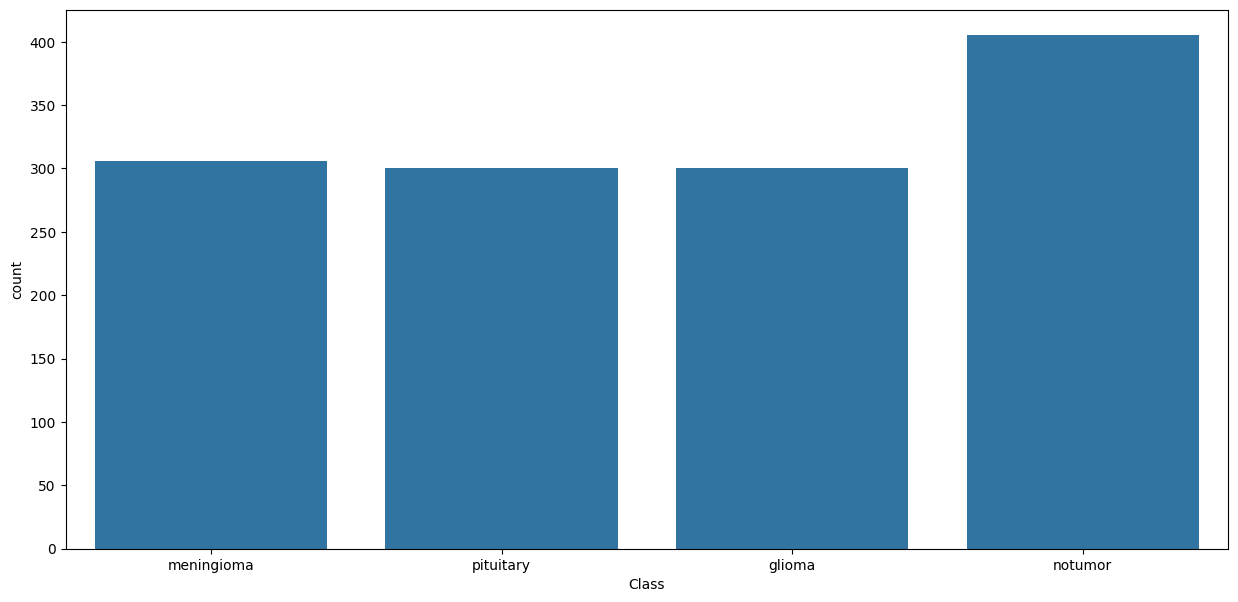

In [10]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

After analyizing the graphs, we can conclude that each category has counts at close range from each other. This is good as we don't have an imbalanced dataset. *If we did, we would've had to Oversample or Undersample*

We now have to split of training and testing dataframes based on the categories. In this project I will be using tensorflow and scikit-learn

In [11]:
#Splitting and evaluate performace
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Creating Neural Networks, Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

To properly evaluate the model's performance, we need to further divide the testing dataset into two equal parts: a validation set and a final test set.

This is a standard practice in machine learning because using separate datasets for training, validation, and testing helps prevent overfitting and provides a more accurate assessment of how well the model generalizes to unseen data.

### Understanding Overfitting in Machine Learning

If you're new to machine learning, you might be wondering about the concept of "overfitting" and why it matters. Let's break it down:

**What is overfitting?**

Imagine you're preparing for a big test. You study the textbook thoroughly, memorize every single practice question, and ace all the quizzes. However, when you finally take the actual exam, you struggle with questions that weren't directly covered in your study materials. This is similar to what happens in overfitting.

In machine learning, overfitting occurs when a model learns the training data *too well*.  It essentially memorizes the specific examples and patterns in the training set, including any noise or random fluctuations. As a result, the model performs exceptionally well on the training data but fails to generalize to new, unseen data.

**Why is overfitting a problem?**

The ultimate goal of machine learning is to build models that can make accurate predictions on new data – data they haven't seen before.  Overfitting hinders this goal because the model becomes too specialized to the training data and loses its ability to adapt to different scenarios.

**How does training, validation, and testing help?**

To prevent overfitting, we divide our data into three sets:

1. **Training set:** This is the data the model learns from. It's like studying the textbook and practice questions.
2. **Validation set:** This is a smaller dataset used to evaluate the model's performance during training. It's like taking quizzes to check your understanding. This allows us to adjust the model and prevent overfitting.
3. **Testing set:** This is a separate dataset used to assess the model's final performance after training is complete. It's like the actual exam – a way to see how well the model generalizes to completely new data.

By using these three sets, we can ensure that our model learns the underlying patterns in the data without getting bogged down by the specific details of the training set, ultimately leading to a more robust and reliable model.

In [12]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])

In [13]:
valid_df

Class Path       Class
1006     /content/Testing/notumor/Te-no_0399.jpg     notumor
363    /content/Testing/pituitary/Te-pi_0022.jpg   pituitary
550    /content/Testing/pituitary/Te-pi_0270.jpg   pituitary
350    /content/Testing/pituitary/Te-pi_0164.jpg   pituitary
830       /content/Testing/glioma/Te-gl_0141.jpg      glioma
...                                          ...         ...
501    /content/Testing/pituitary/Te-pi_0213.jpg   pituitary
693       /content/Testing/glioma/Te-gl_0034.jpg      glioma
1287     /content/Testing/notumor/Te-no_0275.jpg     notumor
1125     /content/Testing/notumor/Te-no_0043.jpg     notumor
211   /content/Testing/meningioma/Te-me_0207.jpg  meningioma

[655 rows x 2 columns]

In [14]:
ts_df

Class Path       Class
400    /content/Testing/pituitary/Te-pi_0161.jpg   pituitary
645       /content/Testing/glioma/Te-gl_0051.jpg      glioma
1164     /content/Testing/notumor/Te-no_0360.jpg     notumor
803       /content/Testing/glioma/Te-gl_0151.jpg      glioma
78    /content/Testing/meningioma/Te-me_0032.jpg  meningioma
...                                          ...         ...
1238     /content/Testing/notumor/Te-no_0339.jpg     notumor
426    /content/Testing/pituitary/Te-pi_0016.jpg   pituitary
553    /content/Testing/pituitary/Te-pi_0178.jpg   pituitary
864       /content/Testing/glioma/Te-gl_0282.jpg      glioma
969      /content/Testing/notumor/Te-no_0082.jpg     notumor

[656 rows x 2 columns]

Before we work with the data, we need to preprocess it. Ensuring that the raw data is transformed into a format that ML Models can understand. For this data, we see that we have images. We have to ensure all images are uniform so setting a universal image size is necessary.

For images specifically, we can process and resize in batches to improve performance and using less memory. More importantly, it helps in avoiding overfitting and can help a model learn more robust features.

In [15]:
batch_size = 32
img_size = (299, 299)

#adjust brightness and rescaling
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [16]:
#Training Dataset
tr_gen = image_generator.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size,
)

#Validation Dataset
valid_gen = image_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size,
)

#Testing Dataset
ts_gen = ts_gen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    shuffle=False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


After running the code above we are presented with text saying how many images in each dataset and classes: glioma, meningioma, pituitary & notumor

Let's now visualize and see these images in the training set:

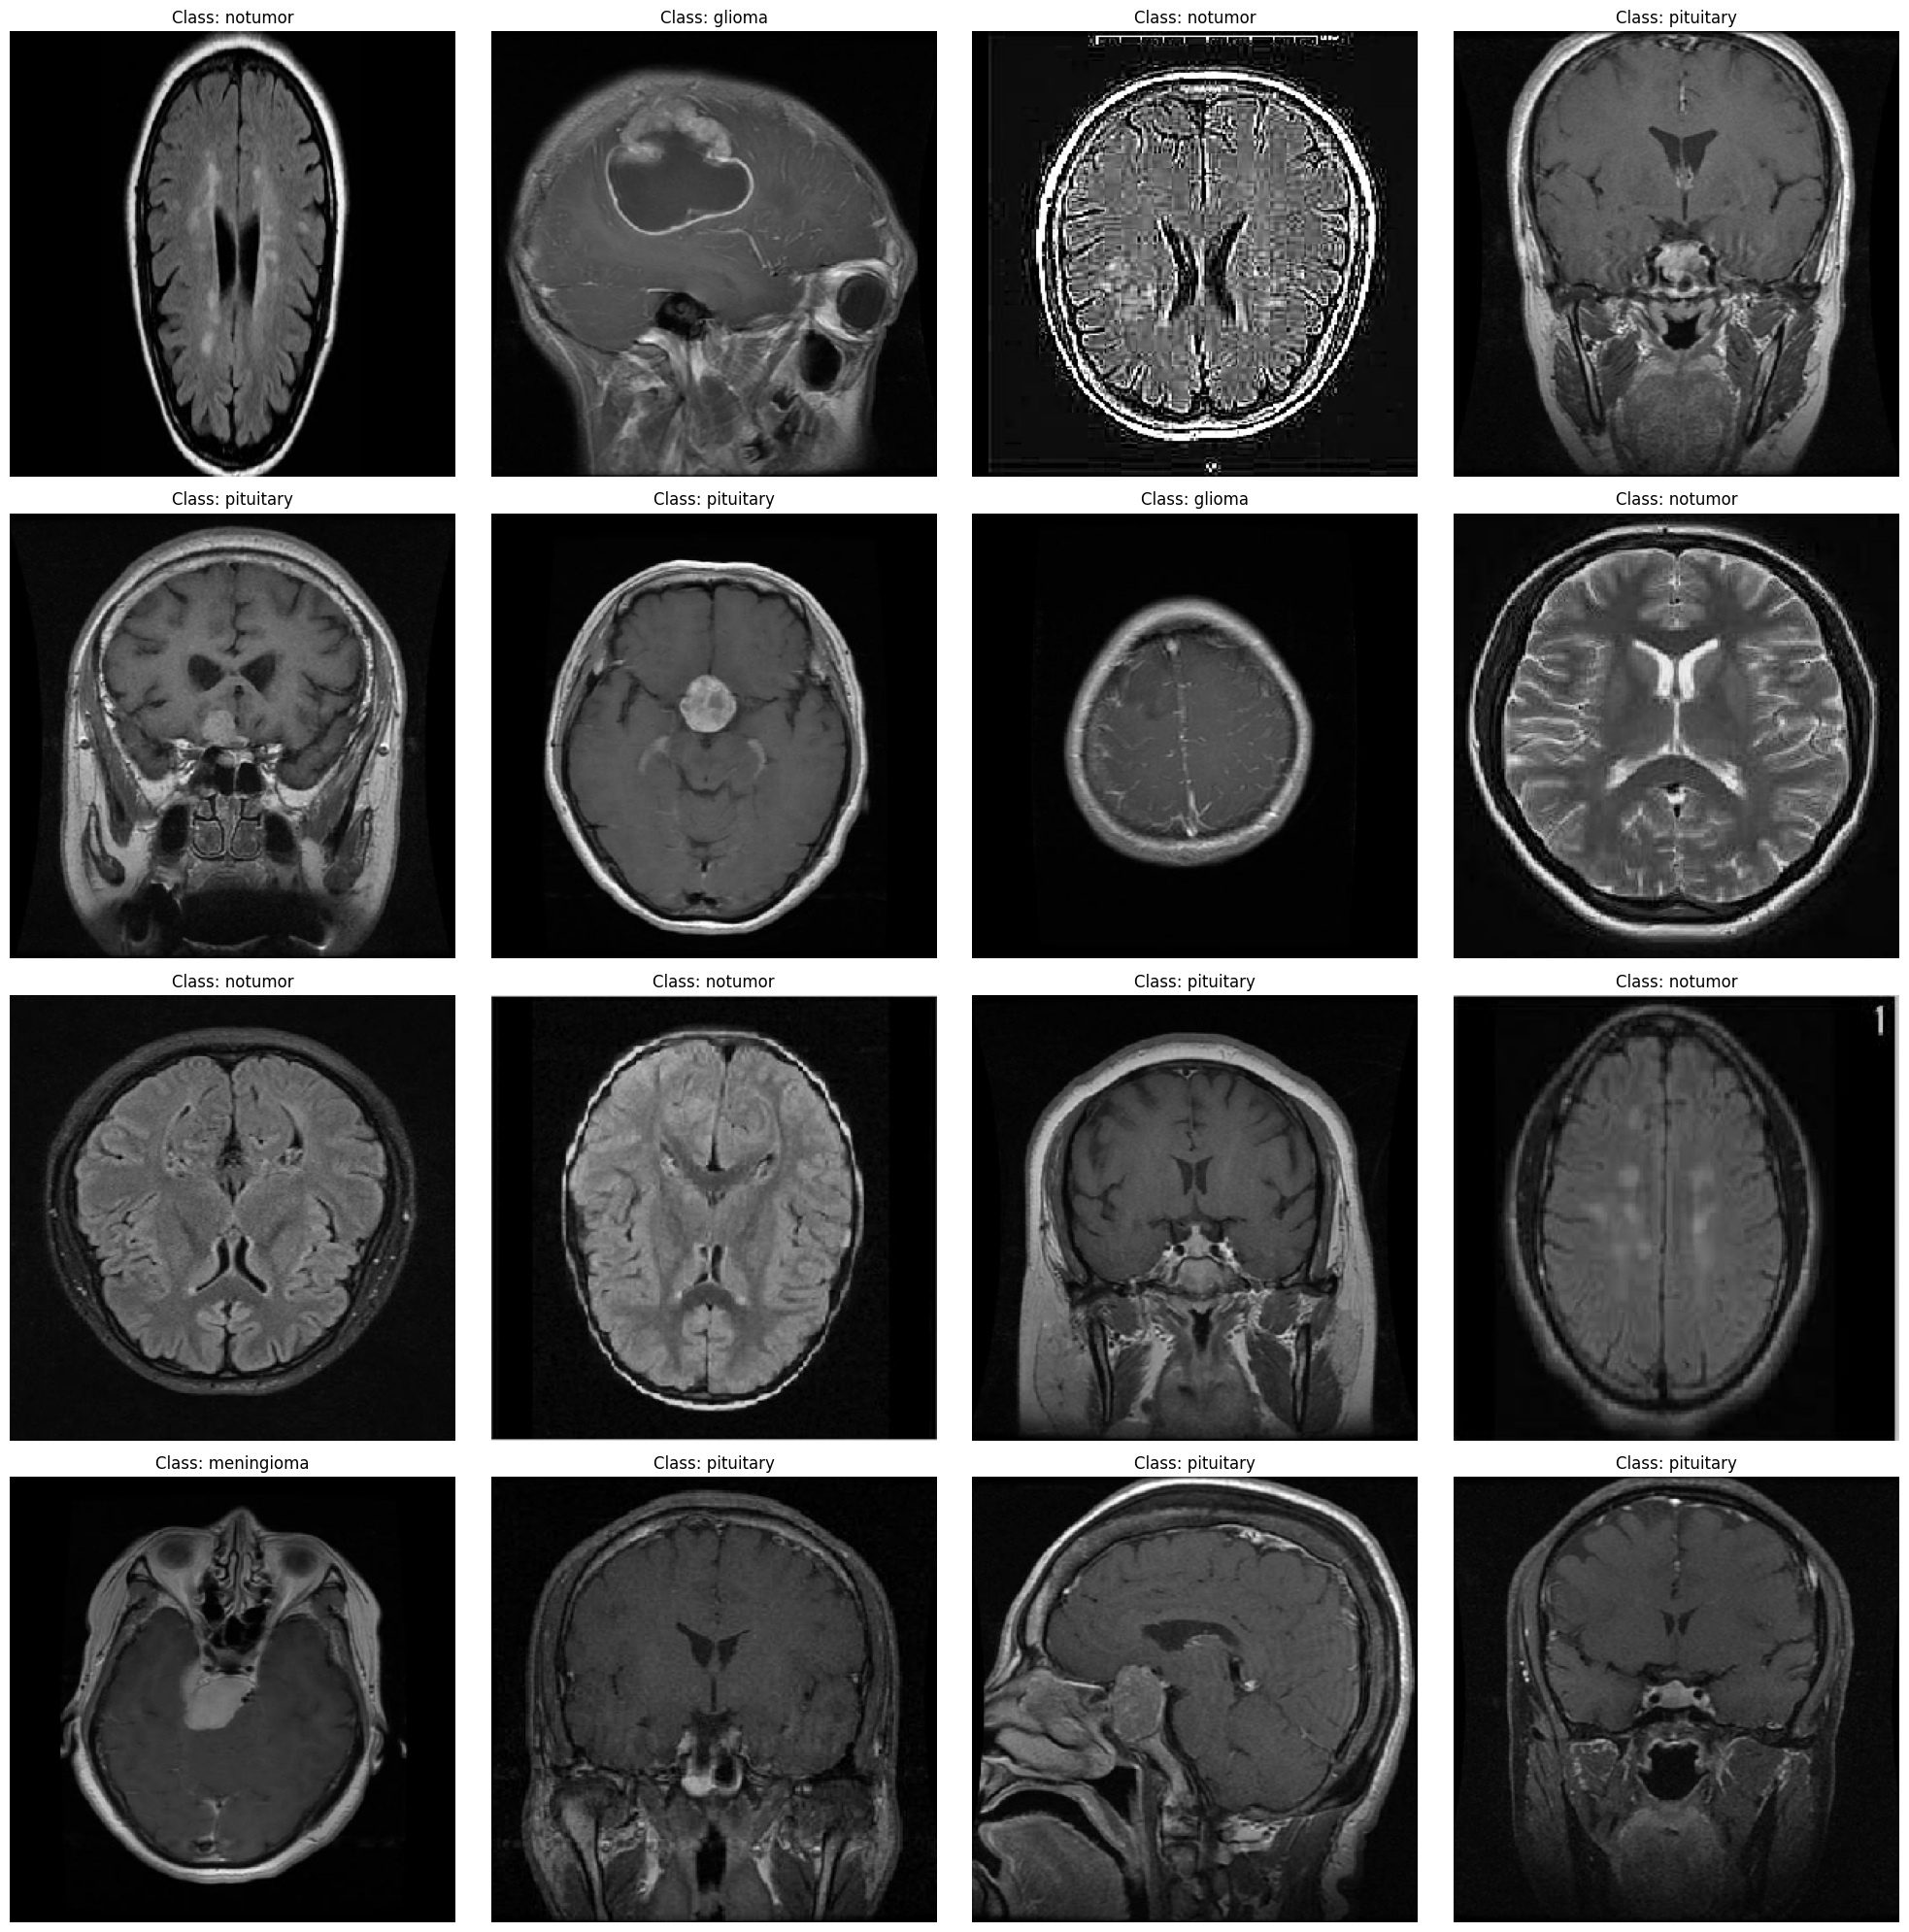

In [17]:
plt.figure(figsize=(20,20))
for i in range(16):
  plt.subplot(4,4,i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  #Get the class index
  class_index = np.argmax(label)

  #Get the list of class names and class indices
  class_name = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  #Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  #Get the class name using the index position
  class_name = class_name[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

The dataset is now ready to be used on a ML Model. The following are the steps we did:


*   Split Data into: Training, Validation, Test
*   Preprocessing:
  *   Rescaling: Normalize the pixel values to be in range 0 to 1.
  *   Brightness: Introduce Brightness augmentation to make model more robust to different lighting conditions in the images
  *   Image Size: Made all images into the same size for consistency





### Model Selection: Xception

#### Origin and Development
In this project, I've chosen to utilize the Xception model, a deep learning architecture renowned for its effectiveness in image classification tasks. This model was developed by **François Chollet** during his time at Google. He also created the [Keras library](https://www.tensorflow.org/guide/keras), a popular library for training deep learning models

#### How Xception Works: Depthwise Separable Convolutions
The Xception model's power stems from its unique approach to image analysis. Instead of processing the entire image at once, it employs a strategy called **depthwise separable convolutions**. This essentially means that the model breaks down the image into smaller, more manageable sections and analyzes each section independently.

#### Xception Pre-training
Xception was pre-trained on the ImageNet dataset, a large and popular dataset in the computer vision community. ImageNet contains over 14 million images categorized into 1,000 different object categories. These images include a wide variety of objects, such as animals (like dogs and cats), vehicles (like cars), and plants.

#### Xception Training Process
The Xception model is trained by being shown millions of images and, over time, learns the patterns and features within those images. This learning process allows it to improve its accuracy in identifying objects or, in this case, classifying brain tumors.

Here's a breakdown:

  1. Exposure to Data: The model is initially exposed to a vast dataset of images, such as the ImageNet dataset, which contains a wide variety of objects. This exposure allows the model to learn general features and patterns common to many images.

  2. Pattern Recognition: As the model processes more images, it begins to recognize recurring patterns and features associated with different objects or categories. This pattern recognition is crucial for the model's ability to make accurate predictions.

  3. Backpropagation: To refine its understanding, the model employs a process called backpropagation. This involves comparing its predictions to the actual labels of the images. If the prediction is incorrect, the model adjusts its internal parameters, called weights, to minimize the difference between its prediction and the correct answer.

  4. Optimization: To enhance the learning process and make it more efficient, the model utilizes optimization techniques like **stochastic gradient descent** (SGD). These techniques guide the adjustment of weights to improve accuracy and convergence during training.

  5. Accuracy Improvement: Through repeated exposure to data, backpropagation, and optimization, the Xception model gradually improves its accuracy in recognizing patterns and making predictions. This process is akin to a student learning from their mistakes and refining their understanding over time.

  6. Validation and Testing: To ensure the model's ability to generalize to new, unseen images, it is evaluated on a separate validation set. This step helps prevent overfitting, where the model becomes too specialized to the training data. Finally, the model's performance is assessed on a test set to provide an accurate measure of its accuracy in classifying images it has never encountered before.

**In summary, the Xception model is trained by being shown millions of images, learning patterns and features, improving accuracy through backpropagation and optimization techniques like stochastic gradient descent (SGD), and undergoing validation and testing to ensure generalization and reliable performance.**


####The Analogy: Human Perception
It's similar to how a human might examine the distinct features of an animal, such as its fur, eyes, paws, or ears, before making a judgment about the animal's species.

####Benefits of Xception's Approach
By dissecting the image in this way, the Xception model can extract a richer set of features, enabling it to make more accurate predictions. This approach also leads to a more efficient use of computational resources, making the model faster and more scalable.

*Below we will use the Xception Base Model with the Keras Sequential model as well.*

### The Sequential Model in Keras: A Building Block Approach
The Sequential model in Keras provides a straightforward way to construct neural networks by sequentially stacking layers. This approach is similar to building with Lego bricks, where each layer represents a distinct building block with a specific function. The output of one layer serves as the input for the subsequent layer, creating a linear flow of information through the network.

This model's simplicity makes it particularly user-friendly for beginners in deep learning. Furthermore, its adaptability allows for seamless integration with pre-trained models like Xception, which is renowned for its effectiveness in image classification tasks. By strategically adding layers before or after the pre-trained model, we, the researchers, can customize the network architecture to address specific tasks, such as the classification of brain tumors in this project.

Essentially, the Sequential model acts as a framework for building a comprehensive deep learning pipeline, resembling an assembly line where images are processed sequentially to generate predictions. This structured approach facilitates the development and refinement of deep learning models for a wide range of applications.

In [18]:
#Give RGB image format
img_shape = (299, 299, 3)

#Xception Base Model with images of dataset
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape,
    pooling='max'
)

#Sequential Model
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


This code snippet prepares the deep learning model for training by defining the learning process, error measurement, and performance evaluation.

It employs the Adamax optimizer for efficient weight adjustments, uses categorical cross-entropy to quantify prediction errors in this multi-class classification task, and tracks accuracy, precision, and recall as key performance indicators during training and evaluation.

By setting up these crucial aspects, the code ensures the model is effectively guided to learn from the data and make accurate predictions.

In [19]:
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       Precision(),
                       Recall()
                      ])

***Make sure to change runtime tyoe to use T4 GPU's***

In [20]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 166s 579ms/step - accuracy: 0.7679 - loss: 0.6928 - precision: 0.8217 - recall: 0.6752 - val_accuracy: 0.9511 - val_loss: 0.1389 - val_precision: 0.9538 - val_recall: 0.9466
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 358ms/step - accuracy: 0.9756 - loss: 0.0654 - precision: 0.9774 - recall: 0.9740 - val_accuracy: 0.9740 - val_loss: 0.0787 - val_precision: 0.9740 - val_recall: 0.9725
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 363ms/step - accuracy: 0.9927 - loss: 0.0286 - precision: 0.9927 - recall: 0.9927 - val_accuracy: 0.9679 - val_loss: 0.1131 - val_precision: 0.9694 - val_recall: 0.9679
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 363ms/step - accuracy: 0.9974 - loss: 0.0128 - precision: 0.9974 - recall: 0.9967 - val_accuracy: 0.9863 - val_loss: 0.0408 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 364ms/step - accuracy: 0.9969 - loss: 0.0084 - precision: 0.9970 - recall: 0.9968 - val_accuracy: 0.9893 - val_loss: 0

Imagine you're teaching a dog a new trick. You show the dog the trick (tr_gen), repeat the process five times (epochs=5), and occasionally test the dog's progress with a slightly different version of the trick (validation_data=valid_gen). The dog's learning process is like the model's training, and its progress is stored in hist.

This line of code essentially starts the process of teaching the model (Xception with Sequential) to classify brain tumor images by feeding it training data, letting it practice for a set number of epochs, and checking its progress along the way using a validation set. The training history is stored in hist for later analysis.

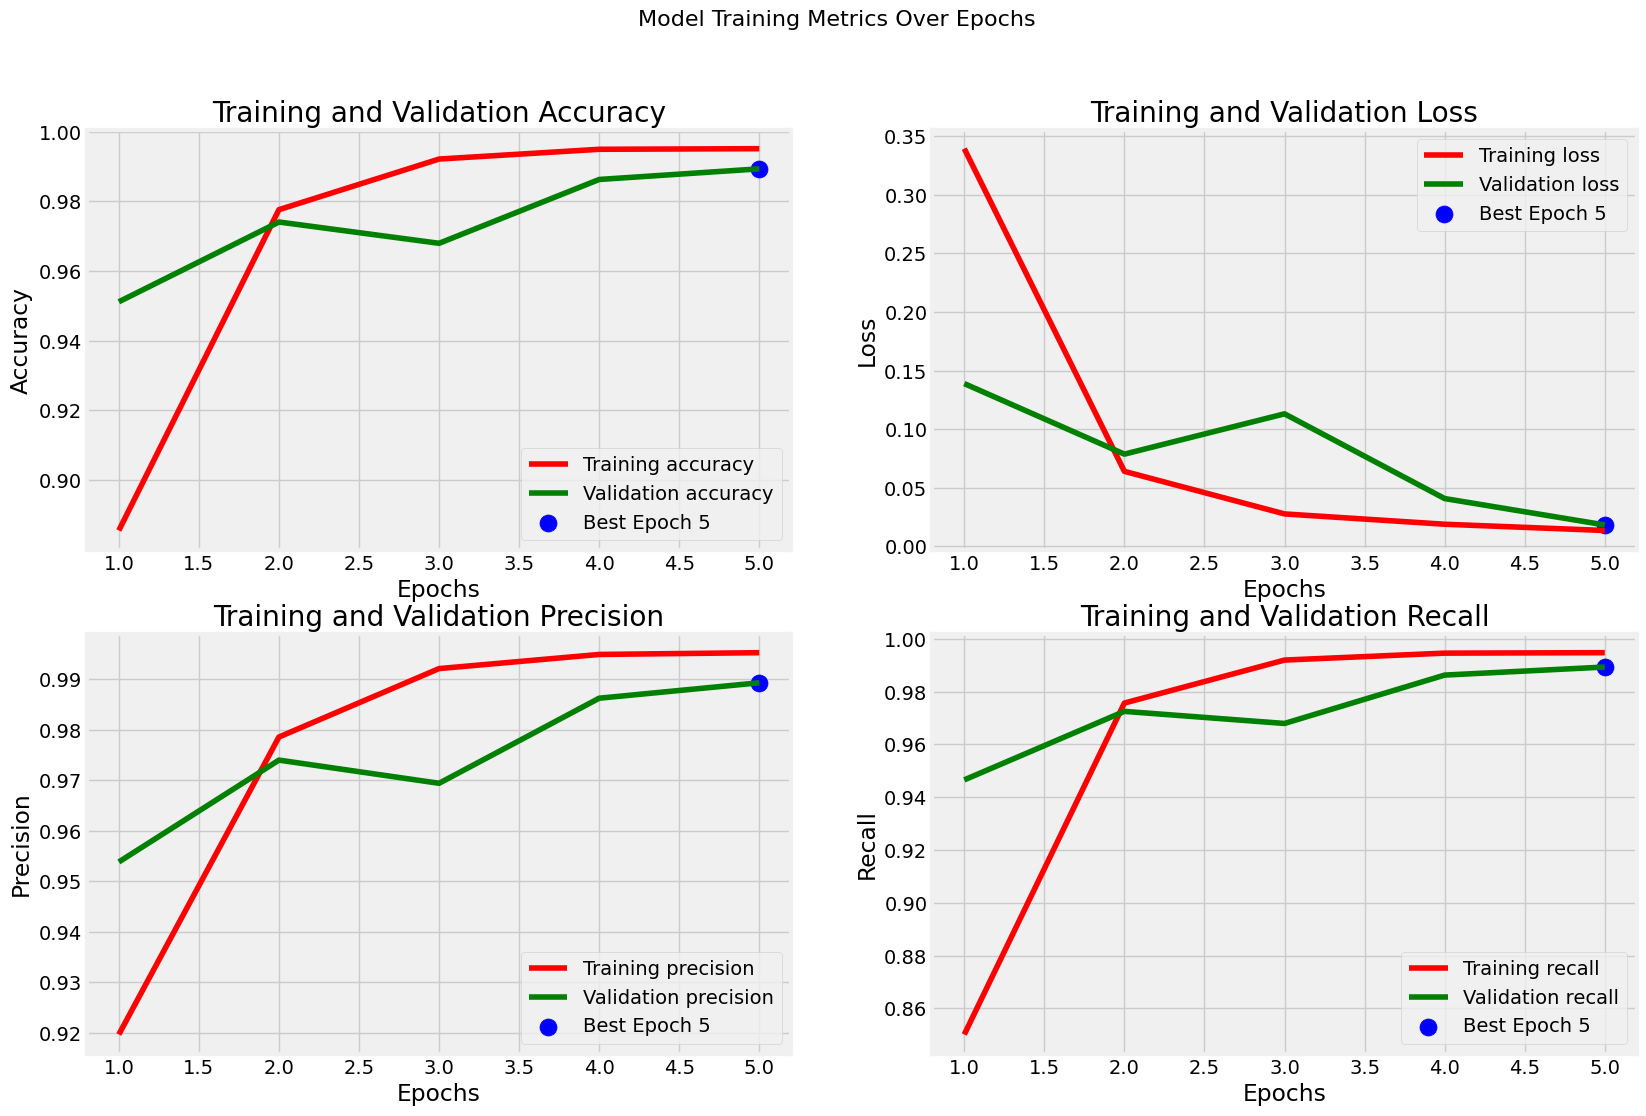

In [21]:
#Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

#Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best Epoch {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [22]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Training Loss: {train_score[0]:.4f}")

print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")

print(f"\n\nTesting Accuracy: {test_score[1]*100:.2f}%")
print(f"Testing Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.9977 - loss: 0.0055 - precision: 0.9977 - recall: 0.9973
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9954 - loss: 0.0126 - precision: 0.9954 - recall: 0.9954
 3/41 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 1.0000 - loss: 0.0195 - precision: 1.0000 - recall: 1.0000 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9964 - loss: 0.0145 - precision: 0.9964 - recall: 0.9964
Training Accuracy: 99.74%
Training Loss: 0.0058


Validation Accuracy: 99.24%
Validation Loss: 0.0190


Testing Accuracy: 99.39%
Testing Loss: 0.0191


Let's analyze the above data. Focus on the Test Accuracy and Test Loss as this is where the model will run on unseen data. We see that for unseen data our model has a 99.xx% accuracy and a very low loss of 0.01xx. This is very good! It means the model is very accurate in classifying tumors

Let's visualize how well this model performed on each class of the brain classification: 'glioma', 'meningioma', 'no_tumor', 'pituitary'.

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step


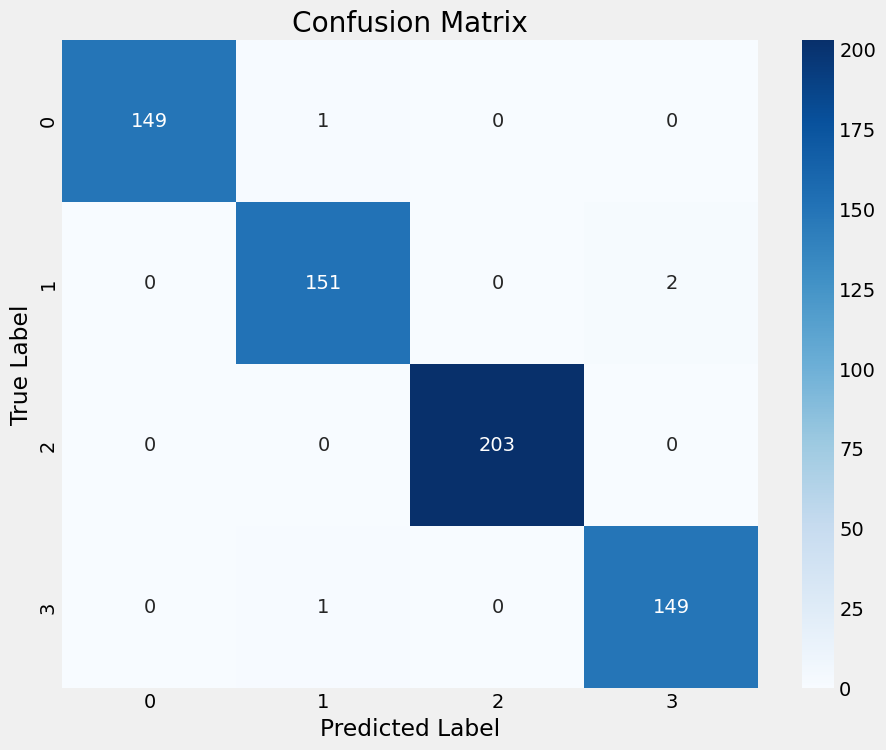

In [23]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

#Display Confusion Matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))

#Create Heatmap labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The Confusion Matrix shows that even though our model is 99% accurate it still mispredicted 4 MRI's out of 5712.

Let's now visualize how our model predicts an image

In [24]:
from PIL import Image

def predict(img_path: str) -> None:

  #Get class labels
  labels = list(class_dict.keys())

  #Create figure
  plt.figure(figsize=(6,8))

  #Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  #Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  #Get predicted clas
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  #Plot original Image
  plt.subplot(2,1,1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  #Plot prediction probabilities
  plt.subplot(2,1,2)
  bars = plt.barh(labels, probabilities)
  plt.title("Class Probabilities")
  plt.xlabel("Probability", fontsize=15)

  #Add probability labels to bars
  ax= plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")


Let's test this function by getting diffrent images from our data and see if it predicts it correctly

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


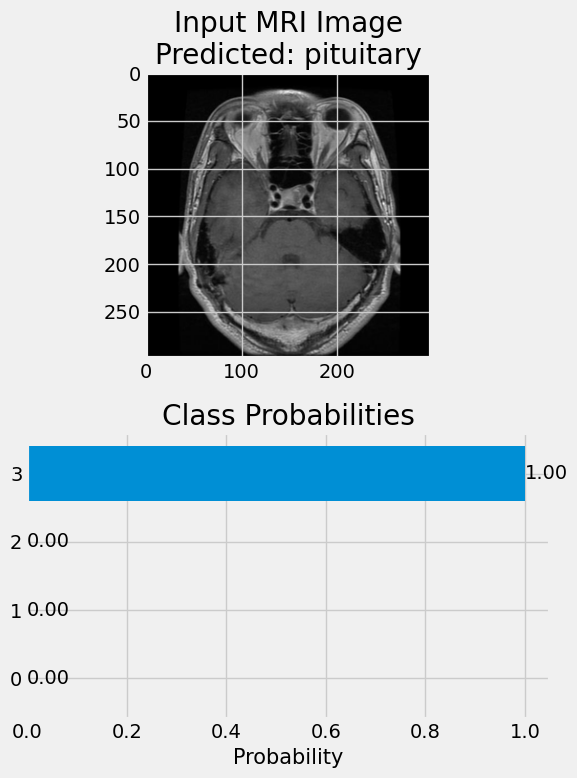


Predicted tumor type: pituitary


In [25]:
predict("/content/Testing/pituitary/Te-piTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


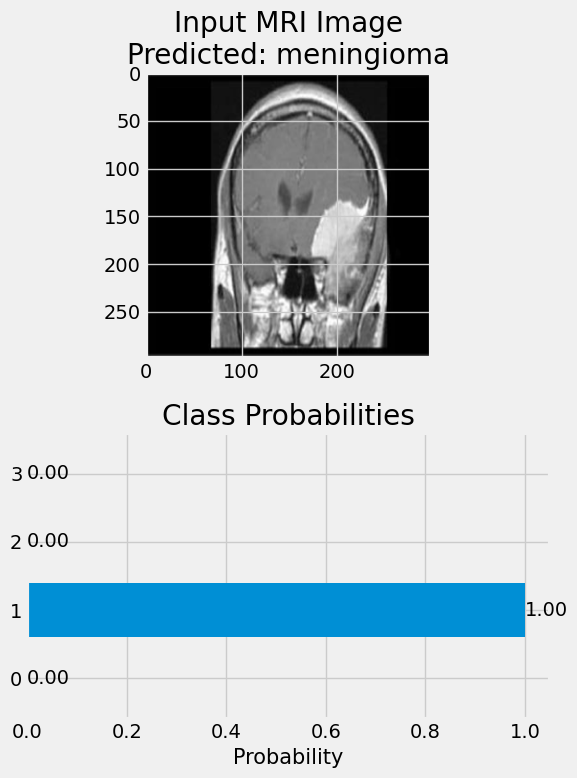


Predicted tumor type: meningioma


In [26]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


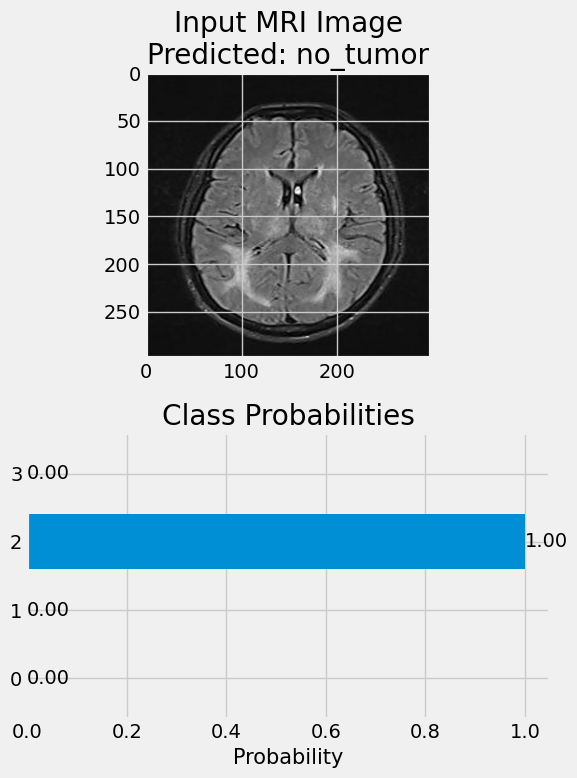


Predicted tumor type: no_tumor


In [27]:
predict("/content/Testing/notumor/Te-noTr_0001.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


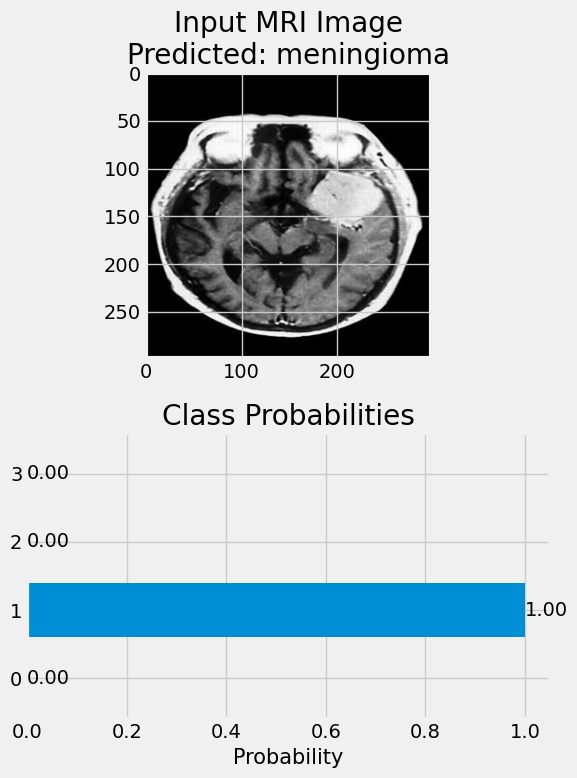


Predicted tumor type: meningioma


In [28]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


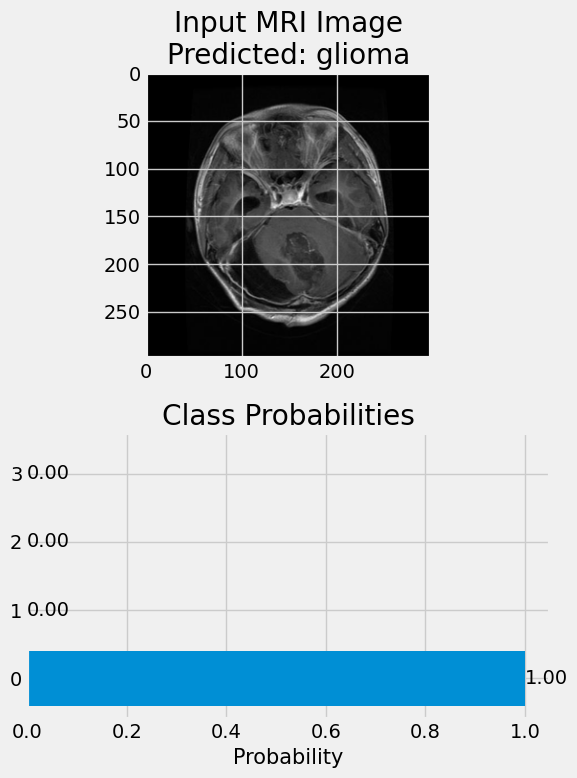


Predicted tumor type: glioma


In [29]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [30]:
model.save_weights("xception_model.weights.h5")

## Conclusion:
This project demonstrated the effectiveness of the Xception model for classifying brain tumors (glioma, meningioma, no tumor, and pituitary) using MRI images. By leveraging depthwise separable convolutions and transfer learning from ImageNet, the model achieved high accuracy (99.39%) on a test dataset, indicating its robustness and generalization capabilities.

The project also highlighted the importance of preprocessing steps such as image resizing and augmentation to enhance model performance. Furthermore, the careful division of the dataset into training, validation, and testing sets played a crucial role in preventing overfitting and ensuring the model's ability to generalize to unseen data.

While the model showcased impressive performance, analysis of the confusion matrix revealed areas for potential improvement. Specifically, a small number of misclassifications were observed, emphasizing the need for ongoing research and refinement to address these limitations. Future work could involve exploring techniques like model explainability methods to provide deeper insights into the model's decision-making process, potentially leading to more targeted interventions.

Overall, this project underscores the immense potential of deep learning models like Xception in assisting medical professionals with brain tumor diagnosis. The high accuracy and efficiency achieved by the model pave the way for more timely and accurate medical interventions, ultimately improving patient outcomes.

# Making a Custom CNN Model
For this project I used the Xception Model with a 99.3% accuracy but, this Model does require alot of computation memory and higher serving costs as it includes:
  * 36 Convolutional Layers
  * 21 million parameters

The Xception Model also recommends to use high GPU's to handle the computation, such as T4, V100, A100. Which not everyone may have.

I will try to achieve this using a Custom CNN Model from scratch, which will not have as much layers and parameters, but, the end goal is to achieve a 90+% accuracy.

For the Custom CNN Model we will focus on implementing:
  * 4 Convolutional Layers
  * 4.7 million parameters
  * Achieve 90+% accuracy, recall and minimum loss

## Why is this important?
If we think about this in a medical field scenario. Only highly updated facilities may have access to run the Xception Model on their computers.

But, what about third world countries? Shouldn't we make the model accessable to all clinics or hospitals?

That is the goal, to be able to create a Custom CNN Model, that would be cheap to deploy, where every medical facility could get a change to use it without the obstacles.

Let's begin with creating our CNN Model:

In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation
from tensorflow.keras import regularizers

In [32]:
# Reduce batch and image size for faster computations
batch_size = 16
img_size = (224, 224)

#adjust brightness and rescaling
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


#Training Dataset
tr_gen = image_generator.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size,
)

#Validation Dataset
valid_gen = image_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size,
)

#Testing Dataset
ts_gen = ts_gen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size,
    shuffle=False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


##Model Creation
The core of the CNN is composed of four convolutional layers. These layers act as feature extractors, learning to identify patterns and textures within the input images. Each convolutional layer is followed by Batch Normalization for training stability and Max Pooling to reduce dimensionality and enhance robustness. Dropout layers are strategically placed to mitigate overfitting.

Here's a breakdown of the convolutional layers:
  1. Conv2D(512, (3, 3), ...): This initial layer uses 512 filters, each with a size of 3x3 pixels, to extract a rich set of features from the input image.
  2. Conv2D(256, (3, 3), ...): The second convolutional layer further refines the features, employing 256 filters.
  3. Conv2D(128, (3, 3), ...): This layer continues the feature extraction process with 128 filters.
  4. Conv2D(64, (3, 3), ...): The final convolutional layer uses 64 filters to capture higher-level features.

###Fully Connected Layers: Classification
After the convolutional layers, a Flatten layer transforms the multi-dimensional feature maps into a single vector. This flattened representation is then fed into two fully connected (Dense) layers. The first Dense layer has 256 neurons and utilizes the ReLU activation function. It is also regularized to prevent overfitting. The final Dense layer has 4 neurons, corresponding to the four brain tumor classes, and uses the softmax activation function to produce probability scores for each class.



In [33]:
#Creating a Sequential Model
cnn_model = Sequential()

#Convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224,224,3), activation='relu'))
# cnn_model.add(BatchNormalizaxtion())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten the output for fully connected layers
cnn_model.add(Flatten())

#Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) #Output layer with 4 neuros for the 4 classes

#Compile the model
cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',Precision(),Recall()])

#Display the model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

##What is BatchNormalization?
BatchNormalization in Keras is a layer that normalizes the activations within each batch during training, making the model train faster and perform better. It does this by scaling and shifting the activations, using learnable parameters to fine-tune the process. This helps to reduce internal covariate shift, making the model more stable and less sensitive to weight initialization, ultimately improving accuracy and speed.

In [34]:
history = cnn_model.fit(tr_gen, epochs=6, validation_data=valid_gen)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 93s 210ms/step - accuracy: 0.5536 - loss: 2.2251 - precision_1: 0.6718 - recall_1: 0.3754 - val_accuracy: 0.7756 - val_loss: 0.8050 - val_precision_1: 0.8172 - val_recall_1: 0.7099
Epoch 2/6
357/357 ━━━━━━━━━━━━━━━━━━━━ 62s 172ms/step - accuracy: 0.8239 - loss: 0.6859 - precision_1: 0.8442 - recall_1: 0.7928 - val_accuracy: 0.8244 - val_loss: 0.6209 - val_precision_1: 0.8470 - val_recall_1: 0.7863
Epoch 3/6
357/357 ━━━━━━━━━━━━━━━━━━━━ 62s 172ms/step - accuracy: 0.8693 - loss: 0.5194 - precision_1: 0.8852 - recall_1: 0.8512 - val_accuracy: 0.8626 - val_loss: 0.5213 - val_precision_1: 0.8849 - val_recall_1: 0.8214
Epoch 4/6
357/357 ━━━━━━━━━━━━━━━━━━━━ 62s 172ms/step - accuracy: 0.8995 - loss: 0.4159 - precision_1: 0.9073 - recall_1: 0.8916 - val_accuracy: 0.8595 - val_loss: 0.4904 - val_precision_1: 0.8772 - val_recall_1: 0.8290
Epoch 5/6
357/357 ━━━━━━━━━━━━━━━━━━━━ 62s 173ms/step - accuracy: 0.9185 - loss: 0.3557 - precision_1: 0.9236 - recall_1: 0.9138 -

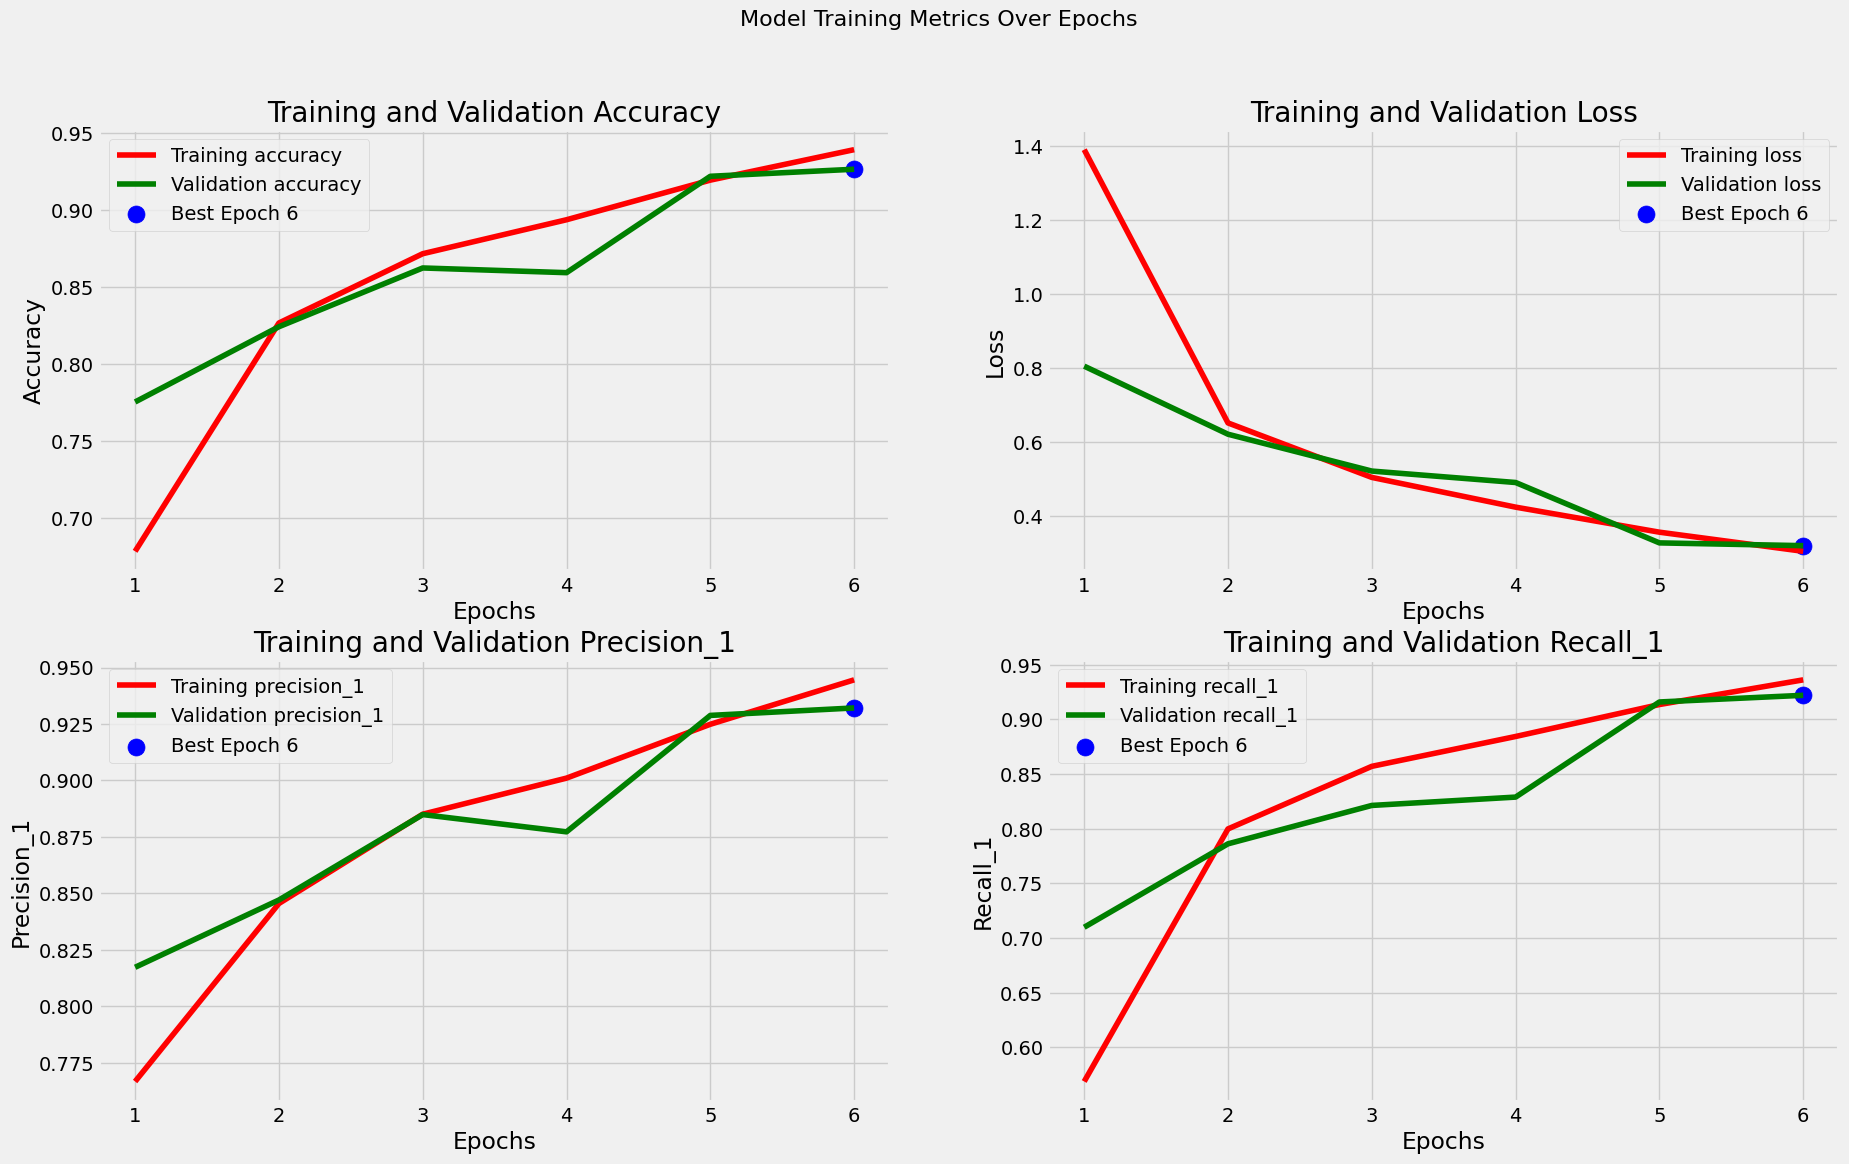

In [35]:
#Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

#Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best Epoch {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [36]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Training Loss: {train_score[0]:.4f}")

print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")

print(f"\n\nTesting Accuracy: {test_score[1]*100:.2f}%")
print(f"Testing Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.9681 - loss: 0.2273 - precision_1: 0.9703 - recall_1: 0.9674
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9258 - loss: 0.3286 - precision_1: 0.9344 - recall_1: 0.9176
 3/41 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8854 - loss: 0.4524 - precision_1: 0.8854 - recall_1: 0.8854

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9199 - loss: 0.3811 - precision_1: 0.9253 - recall_1: 0.9199
Training Accuracy: 96.73%
Training Loss: 0.2252


Validation Accuracy: 92.98%
Validation Loss: 0.3221


Testing Accuracy: 92.07%
Testing Loss: 0.3855


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


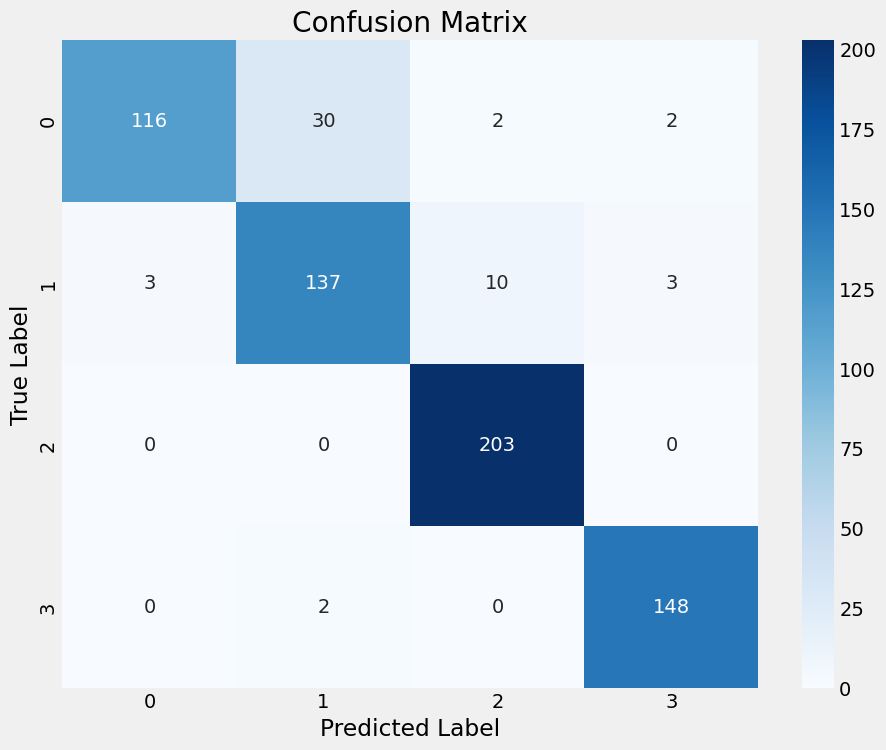

In [37]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

#Display Confusion Matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))

#Create Heatmap labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Let's see the classification report

In [38]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       150
           1       0.81      0.90      0.85       153
           2       0.94      1.00      0.97       203
           3       0.97      0.99      0.98       150

    accuracy                           0.92       656
   macro avg       0.92      0.91      0.92       656
weighted avg       0.93      0.92      0.92       656



In [39]:
#Save Model
cnn_model.save("cnn_model.h5")

#Part 2: Steamlit Web App

In [40]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


In this project, I'm utilizing ngrok to establish a secure connection between my local development environment and the internet. This allows me to seamlessly share my Streamlit-powered brain tumor classification application with others for testing and demonstration purposes.

ngrok generates a temporary public URL, eliminating the need for complex deployment procedures during this phase.

Additionally, I've incorporated threading to manage the ngrok tunnel and the Streamlit application concurrently, ensuring a smoother and more responsive user experience.

In [41]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

Now head to [ngrok.com](https://ngrok.com/) and create an account.
Remember to paste your AuthToken in the secretkeys section of Google Colab

In [42]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(ngrok_token)

In [43]:
#Helper function to run streamlit
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [44]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

import numpy as np
import plotly.graph_objects as go
import cv2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

#Load our Google API KEY to use Gemini
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

#Check if saliency_maps directory exists
output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)


#Generate Explanation Prompt
def generate_explanation(img_path, model_prediction, confidence):

  prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of the brain tumor MRI scan. The saliency map was generated by a deep learning model that was trained to classify brain tumors as either glioma, meningioma, pituitary, or no tumor.

  The saliency map highlughts the regions of the image that the machine learning model is focusing on to make the prediction.

  The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

  In your response:
   - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
   - Explain possible reasons why the model made the prediction it did.
   - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, whuch are in light cyan' in your explanation.
   - Keep your explanation to 4 sentences max.

   Let's think step by step about this. Verify step by step.
  """

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])

  return response.text



#Create Saliency Map
def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()

  #Resize gradients to match original image size
  gradients = cv2.resize(gradients, img_size)

  #Create a circular mask for the brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

  #Apply mask to gradients
  gradients = gradients * mask

  #Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  #Apply a higher threshold
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0

  #Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  #Create heatmap overlay with enhanced contrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  #Resize heatmap to match original image size
  heatmap = cv2.resize(heatmap, img_size)

  #Overlay heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

  #Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img



#Load Xception Model Selected
def load_xception_model(model_path):
  img_shape=(299,299,3)
  base_model = tf.keras.applications.Xception(
      weights='imagenet',
      input_shape=img_shape,
      include_top=False,
      pooling='max'
  )
  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])
  model.build((None,) + img_shape)
  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy',Precision(),Recall()]
                )
  model.load_weights(model_path)
  return model


 #Streamlit UI
st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify.")

#Allow users to upload MRI images to model in streamlit
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Select Model",
      ("Transer Learning - Xception", "Custom_CNN")
  )
  #Load user choice of model selected
  if selected_model == "Transer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299, 299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size = (224, 224)

  labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
  #Process Image
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255

  prediction = model.predict(img_array)

  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}: {prob:.4f}")

  #Display saliency map
  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption='Uploaded MRI', use_container_width  =True)
  with col2:
    st.image(saliency_map, caption='Saliency Map', use_container_width  =True)


  #Classification Results
  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
      f"""
    <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
      <div style="display: flex; justify-content: space-between; align-items: center;">
        <div stlye="flex: 1; text-align:center;">
          <h3 stlye="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Predictions</h3>
          <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
            {result}
          </p>
        </div>
        <div style=width:2px; height:80px; background-color: #ffffff; margin: 0 20px;"></div>
        <div style=flex: 1; text-align: center;">
          <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
          <p stlye="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
            {prediction[0][class_index]:.4%}
          </p>
        </div>
      </div>
    </div>
    """,
    unsafe_allow_html=True
  )

  #Prepare date for Plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  #Create Plotly bar chart
  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  #Customize the chart layout
  fig.update_layout(
      title='Prediction Probabilities',
      xaxis_title='Probability',
      yaxis_title='Class',
      height=400,
      yaxis=dict(autorange='reversed')
  )

  #Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text=f'{prob:.4f}',
        showarrow=False,
        xanchor='left',
        xshift=5
    )

  #Display the Plotly chart
  st.plotly_chart(fig)



  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  #Generate Explanation
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write("## Explanation")
  st.write(explanation)

Writing app.py


##Streamlit UI: Enhancing User Interaction and Interpretability
The Streamlit UI is designed to provide users with an intuitive interface for interacting with the brain tumor classification models and interpreting their predictions. This section elaborates on two key functionalities: model selection and saliency map visualization.

----

###Model Selection: Tailoring to Computational Resources
The Streamlit application offers users the flexibility to choose between two distinct models for brain tumor classification: the Xception model, based on transfer learning, and a custom-designed CNN model. This choice is crucial in accommodating varying computational resources available in different medical settings.

#### Rationale for Model Options:
  * Transfer Learning - Xception: This model leverages the pre-trained Xception architecture, renowned for its high accuracy in image classification tasks. However, its computational demands may be substantial, requiring high-performance GPUs for optimal performance. Therefore, it is recommended for facilities with access to such resources.

  * Custom CNN: The custom CNN model is designed with computational efficiency in mind. It has fewer layers and parameters than Xception, making it suitable for deployment in settings with limited GPU capabilities. While potentially sacrificing some accuracy compared to Xception, it aims to achieve a balance between performance and accessibility.

By providing these options, the application caters to diverse medical environments, ensuring wider accessibility to brain tumor classification tools.

----
###Saliency Map: Unveiling Model Focus for Enhanced Trust
Saliency maps are incorporated into the Streamlit UI to provide visual explanations of the model's predictions. These maps highlight the regions of the input MRI image that most significantly influence the classification outcome, thereby enhancing the interpretability and trustworthiness of the model.

#### Significance of Saliency Maps:
  * Visualizing Decision-Making: Saliency maps offer a window into the model's decision-making process by revealing the areas of focus within the image. This visual representation helps medical professionals understand the basis for the model's predictions.

  * Enhancing Trust and Confidence: The ability to visualize the model's attention allows users to assess whether the model is focusing on relevant anatomical features associated with brain tumors. This transparency fosters trust and confidence in the model's predictions, aiding in clinical decision-making.

  * Identifying Potential Biases: Saliency maps can also help identify potential biases in the model's predictions. For instance, if the model consistently focuses on irrelevant image regions, it may indicate underlying biases in the training data or model architecture. Addressing such biases is crucial for ensuring the model's reliability and fairness

#### Implementation:
Saliency maps are generated using gradient-based methods, which calculate the gradients of the model's output with respect to the input image pixels. These gradients indicate the sensitivity of the model's prediction to changes in pixel values, revealing the areas of focus. The saliency map is then visualized by overlaying these gradients on the original image, typically using heatmaps or color-coded highlights.

In [49]:
%%writefile requirements.txt
streamlit
tensorflow
scikit-learn
pandas
numpy
matplotlib
seaborn
plotly
opencv-python-headless
Pillow
pyngrok
python-dotenv
google-generativeai

Writing requirements.txt


In [50]:
import os

cnn_model_size = os.path.getsize("cnn_model.h5") / (1024 * 1024)  # Size in MB
xception_model_size = os.path.getsize("xception_model.weights.h5") / (1024 * 1024)  # Size in MB # or os.path.getsize("xception_model.h5") / (1024 * 1024)
print(f"CNN Model Size: {cnn_model_size:.2f} MB")
print(f"Xception Model Size: {xception_model_size:.2f} MB")

CNN Model Size: 54.71 MB
Xception Model Size: 241.78 MB
